In [136]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hvplot.pandas
import sqlite3
import pprint as pprint
import os

# Create SQLite connection and cursor
conn = sqlite3.connect('TaylorSwift_streamingdata.db')
cursor = conn.cursor()

# Define CSV files
csv_files = ['Resources/Taylor_Swfit_Data.csv']

# Get the current directory
current_directory = os.getcwd()  # Get the current working directory

# Construct full paths to CSV files
csv_files = [os.path.join(current_directory, csv_file) for csv_file in csv_files]

# Define table names
table_names = ['Taylor_Swift_Data']

# Create tables and insert data from CSVs
for csv_file, table_name in zip(csv_files, table_names):
    # Read CSV file into a pandas DataFrame
    data = pd.read_csv(csv_file)
    # Create table in SQLite database
    data.to_sql(table_name, conn, if_exists='replace', index=False)

# Commit changes and close connection
conn.commit()
conn.close()

# Reconnect to the SQLite database
conn = sqlite3.connect('TaylorSwift_streamingdata.db')
cursor = conn.cursor()

# Display the tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables:", [table[0] for table in tables])

Tables: ['Taylor_swift_tracks', 'streamingdata', 'Taylor_Swift_Features', 'Taylor_Swift_Data']


In [101]:
cursor.execute("SELECT * FROM Taylor_Swift_Data LIMIT 1;")
print("Example row from Taylor_Swift_Data:", cursor.fetchone())

Example row from Taylor_Swift_Data: ('Cruel Summer', 1828886612, 4911187, 'Lover', '1NAmidJlEaVgA3MpcPFYGq', '23/08/2019', 2, '1BxfuPKGuaTgP7aM0Bbdwr', 0, 'spotify:track:1BxfuPKGuaTgP7aM0Bbdwr', 0.117, 0.552, 0.702, 2.06e-05, 0.105, -5.707, 0.157, 169.994, 0.564, 99, 178426, 0.701923077, 0.472477064, 0.762965737, 0.150635617, 0.723592362, 0.581492933, 0.179648642)


In [102]:
cursor.execute("SELECT COUNT(*) FROM Taylor_Swift_Data;")
print("Length of Taylor_Swift_Data:", cursor.fetchone()[0])

Length of Taylor_Swift_Data: 283


In [103]:
cursor.execute("SELECT * FROM Taylor_Swift_Data;")
TS_Data = cursor.fetchall()

In [104]:
# List all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables:", [table[0] for table in tables])

Tables: ['Taylor_swift_tracks', 'streamingdata', 'Taylor_Swift_Features', 'Taylor_Swift_Data']


# Gayathripriya Vijayakumar - Code

In [105]:
array_streamingdata = []
array_num = np.arange(0, 500, 1, dtype=int)

# Fetch data from SQLite database
conn = sqlite3.connect('TaylorSwift_streamingdata.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM Taylor_Swift_Data;")
rows = cursor.fetchall()

# Process fetched data
for row in rows:
    array_streamingdata.append({
        "song_name": row[0],  # Assuming song_name is the first column
        "total_streams": row[1],  # Assuming total_streams is the second column
        "daily_streams": row[2]  # Assuming daily_streams is the third column
    })

# Create DataFrame from processed data
TS_streamingdata_df = pd.DataFrame(data=array_streamingdata)

# Convert data types
TS_streamingdata_df = TS_streamingdata_df.convert_dtypes(infer_objects=False, convert_string=True)

# Set index
TS_streamingdata_df.set_index('song_name', inplace=True)

# Scale the data
scaler = StandardScaler()
New_TS_Streamingdata_scaled = scaler.fit_transform(TS_streamingdata_df[['total_streams', 'daily_streams']])

New_TS_Streamingdata_scaled

array([[ 5.34692083e+00,  1.06568104e+01],
       [ 5.04421021e+00,  1.98975000e+00],
       [ 4.54222845e+00,  1.64307312e+00],
       [ 4.01501754e+00,  3.76736104e+00],
       [ 3.68779651e+00,  1.19536543e+00],
       [ 3.46390990e+00,  4.03172079e+00],
       [ 3.15542644e+00,  3.31157874e+00],
       [ 3.04898070e+00,  1.24164600e+00],
       [ 2.84812747e+00,  1.35820918e+00],
       [ 2.59595361e+00,  2.73590407e+00],
       [ 2.50217526e+00,  2.60928170e+00],
       [ 2.30256285e+00,  1.28034175e+00],
       [ 2.29085992e+00,  4.00516491e-01],
       [ 2.14275455e+00,  1.01058508e+00],
       [ 2.04680749e+00,  4.11931841e-01],
       [ 1.97604661e+00,  1.43150124e-01],
       [ 1.86155160e+00,  4.57946724e-01],
       [ 1.81887246e+00,  1.37215435e+00],
       [ 1.80351373e+00,  1.41825471e+00],
       [ 1.76464375e+00,  5.07866068e-01],
       [ 1.56447430e+00,  9.37005622e-01],
       [ 1.52482082e+00,  1.31067410e+00],
       [ 1.52323578e+00,  2.11265504e+00],
       [ 1.

In [106]:
# Process fetched data
array_streamingdata = []
for row in rows:
    array_streamingdata.append({
        "song_name": row[0],  # Assuming song_name is the first column
        "total_streams": row[1],  # Assuming total_streams is the second column
        "daily_streams": row[2]  # Assuming daily_streams is the third column
    })

# Create DataFrame from processed data
TS_streamingdata_df = pd.DataFrame(data=array_streamingdata)

# Convert data types
TS_streamingdata_df = TS_streamingdata_df.convert_dtypes(infer_objects=False, convert_string=True)

# Set index
TS_streamingdata_df.set_index('song_name', inplace=True)

# Scale the data
scaler = StandardScaler()
New_TS_Streamingdata_scaled = scaler.fit_transform(TS_streamingdata_df[['total_streams', 'daily_streams']])

# Perform MiniBatchKMeans clustering
model = MiniBatchKMeans(n_clusters=3, random_state=30, max_iter=25, n_init="auto")
model.fit(New_TS_Streamingdata_scaled)
streaming_clusters = model.predict(New_TS_Streamingdata_scaled)

# Create DataFrame with scaled data and cluster labels
streamscaled = pd.DataFrame(New_TS_Streamingdata_scaled, columns=['total_streams', 'daily_streams'])
streamscaled['kmeans_fit'] = streaming_clusters

# Store inertia values and k values
inertia = []
k = list(range(1, 11))
for i in k:
    k_model = MiniBatchKMeans(n_clusters=i, random_state=0)
    k_model.fit(New_TS_Streamingdata_scaled)
    inertia.append(k_model.inertia_)

# Create DataFrame for elbow plot data
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Save elbow plot data to CSV
df_elbow.to_csv("elbow_plot_data.csv")

C:\Users\rowve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
C:\Users\rowve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\rowve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
C:\Users\rowve\anaconda3\Lib\site-packages\sklearn\cluster\_kmean

In [107]:
df_elbow.hvplot.line(x="k",y="inertia", title = "Elbow Curve",xticks =k)

:Curve   [k]   (inertia)

###the streaming increased at k = 6 and the inertia values has increased significantly.

In [108]:

# Connect to SQLite database
conn = sqlite3.connect('TaylorSwift_streamingdata.db')
cursor = conn.cursor()

# Fetch data from SQLite
cursor.execute("SELECT * FROM Taylor_Swift_Data")
tstracks = cursor.fetchall()
conn.close()

# Convert fetched data to DataFrame
TS_trackinfo_df = pd.DataFrame(data=tstracks, columns=[i[0] for i in cursor.description])

# Convert specific columns to string type
TS_trackinfo_df = TS_trackinfo_df.astype({"album_id": 'string', "album_name":'string', "song_name": 'string'})

# Extract required columns
new_TS_trackinfo = TS_trackinfo_df[["album_name", "song_name","release_date","duration_ms","track_number","popularity","uri"]]

# Group data by album name
v = pd.Series(new_TS_trackinfo.groupby('album_name')["popularity"].sum())
c = pd.Series(new_TS_trackinfo.groupby('album_name')['song_name'].count())
y = c.values.reshape(-1, 1)
x = v.values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the data into the model
model.fit(x, y)

# Display the slope
print(f"Model's slope: {model.coef_}")

# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

# Display the model's formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}x")

# Predicting rate of popularity increase
y_18 = model.intercept_ + model.coef_[0] * 18

# Display prediction
print(f"Prediction for popularity with a span of 18 years: {y_18}")

# Predicted popularity values
predicted_y_values = model.predict(x)

# Create DataFrame for popularity
df_popularity = pd.DataFrame(data=v)
df_popularity["predicted popularity"] = predicted_y_values
df_popularity['Album'] = new_TS_trackinfo['album_name'].unique()

# Reset index
df_popularity.reset_index(inplace=True)

# Creating a shortened version of album name for plotting
df_popularity['X_Label'] = df_popularity['Album'].apply(lambda x: x.split()[0])

df_popularity

Model's slope: [[0.01109007]]
Model's y-intercept: [4.30171061]
Model's formula: y = [4.30171061] + [0.01109007]x
Prediction for popularity with a span of 18 years: [4.50133183]


,album_name,popularity,predicted popularity,Album,X_Label
0,1989,983,15.203248,Lover,Lover
1,1989 (Taylor's Version),1778,24.019852,1989,1989
2,Fearless,957,14.914906,Reputation,Reputation
3,Fearless (Taylor's Version),1861,24.940327,Midnights,Midnights
4,Lover,1482,20.737191,folklore,folklore
5,Midnights,1800,24.263833,reputation,reputation
6,Red,997,15.358508,Fearless,Fearless
7,Red (Taylor's Version),2207,28.777491,Red,Red
8,Reputation,86,5.255456,evermore,evermore
9,Speak Now,1082,16.301164,Red (Taylor's Version),Red


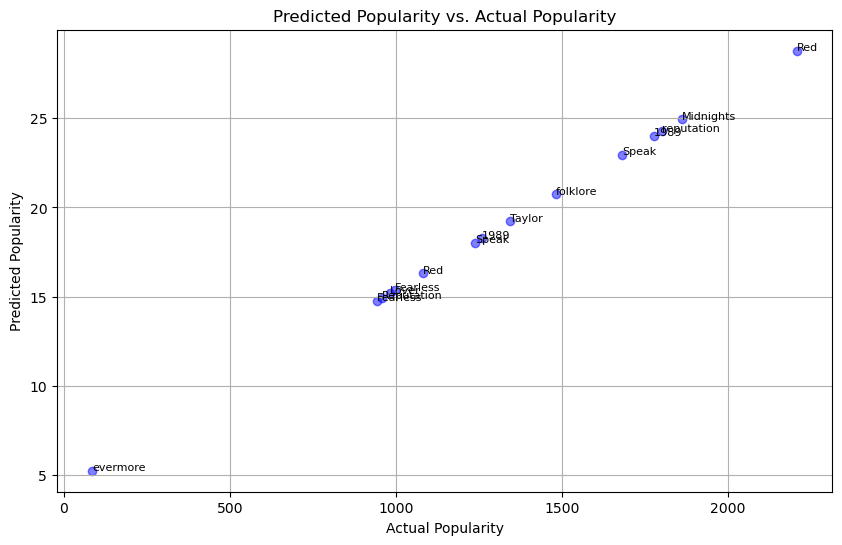

In [109]:
# Plot the predicted popularity results with labels
plt.figure(figsize=(10, 6))
plt.scatter(df_popularity["popularity"], df_popularity["predicted popularity"], color='blue', alpha=0.5)

# Add labels for each point
for i, txt in enumerate(df_popularity["X_Label"]):
    plt.annotate(txt, (df_popularity["popularity"][i], df_popularity["predicted popularity"][i]), fontsize=8)

plt.title('Predicted Popularity vs. Actual Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.grid(True)
plt.show()

In [110]:
from sklearn.metrics import mean_squared_error, r2_score
x = df_popularity['popularity'].values.reshape(-1,1)
y = df_popularity['predicted popularity'].values.reshape(-1,1)

score = model.score(x, y, sample_weight = None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)
print(f"The score is :{score}")
print(f"The r2 score is :{r2}")
print(f"The mean squared error is :{mse}")
print(f"The root mean squared error is :{rmse}")
print(f"The standard deviation is : {std}")

The score is :1.0
The r2 score is :1.0
The mean squared error is :0.0
The root mean squared error is :0.0
The standard deviation is : 5.550225696825544


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Connect to SQLite database
conn = sqlite3.connect('TaylorSwift_streamingdata.db')
cursor = conn.cursor()

# Fetch data from SQLite
cursor.execute("SELECT track_number, popularity, explicit FROM Taylor_Swift_Data")
tstracks = cursor.fetchall()
conn.close()

# Convert fetched data to DataFrame
new_TS_trackinfo = pd.DataFrame(data=tstracks, columns=['track_number', 'popularity', 'explicit'])

# Support vector machine classification
target = new_TS_trackinfo["explicit"]
target_names = ["not_explicit", "explicit"]
data = new_TS_trackinfo.drop("explicit", axis=1)
feature_names = data.columns

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=54)

# Create and train the Support Vector Machine model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Model Accuracy
print('Test accuracy:', model.score(X_test, y_test))

Test accuracy: 0.9436619718309859


In [112]:
#calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions, target_names = target_names))

              precision    recall  f1-score   support

not_explicit       0.94      1.00      0.97        67
    explicit       0.00      0.00      0.00         4

    accuracy                           0.94        71
   macro avg       0.47      0.50      0.49        71
weighted avg       0.89      0.94      0.92        71



C:\Users\rowve\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rowve\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rowve\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Adam Faisal - Code

C:\Users\rowve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rowve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


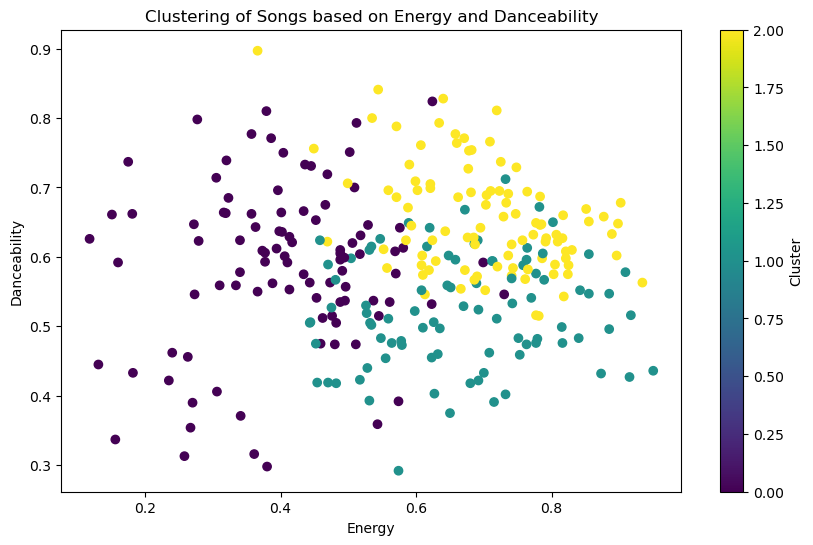

   danceability    energy  loudness  speechiness  acousticness  \
0      0.586073  0.406125 -9.918104     0.058200      0.614648   
1      0.521427  0.666202 -5.400416     0.048021      0.092778   
2      0.655602  0.703827 -5.914051     0.052263      0.104086   

   instrumentalness  liveness   valence       tempo  
0          0.009229  0.121594  0.305769  117.293865  
1          0.000105  0.199562  0.308118  133.845169  
2          0.000540  0.113288  0.586796  121.473745  
cluster
2    98
0    96
1    89
Name: count, dtype: int64


In [118]:
# Connect to SQLite database
conn = sqlite3.connect('TaylorSwift_streamingdata.db')
cursor = conn.cursor()

# Fetch required features from SQLite
cursor.execute("SELECT danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo FROM Taylor_Swift_Data")
features_data = cursor.fetchall()
conn.close()

# Convert fetched data to DataFrame
data = pd.DataFrame(data=features_data, columns=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['energy'], data['danceability'], c=data['cluster'], cmap='viridis')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.title('Clustering of Songs based on Energy and Danceability')
plt.colorbar(label='Cluster')
plt.show()

# Analyze the cluster characteristics
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=data.columns[:-1])
print(cluster_centers)

# Count the number of songs in each cluster
print(data['cluster'].value_counts())

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Features and target variable
X = scaled_features  # the scaled features we used for clustering
y = data['cluster']  # the cluster labels as target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       1.00      0.81      0.89        26
           2       0.69      1.00      0.81        11

    accuracy                           0.89        57
   macro avg       0.88      0.92      0.89        57
weighted avg       0.92      0.89      0.90        57

Accuracy: 0.8947368421052632


In [122]:

# Connect to SQLite database
conn = sqlite3.connect('TaylorSwift_streamingdata.db')
cursor = conn.cursor()

# Fetch data from SQLite
cursor.execute("SELECT song_name, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo FROM Taylor_Swift_Data")
songs_data = cursor.fetchall()
conn.close()

# Convert fetched data to DataFrame
data = pd.DataFrame(data=songs_data, columns=['song_name', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])

def find_similar_songs(song_name, data, top_n=5):
    # Check if the song is in the data
    if song_name not in data['song_name'].values:
        return "Song not found in the dataset."
    
    # Get the features of the input song
    song_features = data.loc[data['song_name'] == song_name, data.columns[1:]].values
    
    # Compute the distance of this song to all others
    distances = cdist(song_features, data[data.columns[1:]], 'euclidean')

    # Get the indices of the songs with the smallest distance
    indices = np.argsort(distances)[0][:top_n]
    
    # Return the most similar songs
    return data.loc[indices, 'song_name']

# Test the function with a song name from your dataset
song_name = data.loc[25, 'song_name']  # replace with a song from the dataset
similar_songs = find_similar_songs(song_name, data)
print("Similar songs to '{}':".format(song_name))
print(similar_songs)

Similar songs to 'Lavender Haze':
25     Lavender Haze
111         marjorie
79     The Great War
11          Delicate
59             betty
Name: song_name, dtype: object


In [124]:
# Labeling the mood based on valence and energy
def label_mood(row):
    if row['valence'] > 0.5 and row['energy'] > 0.5:
        return 'Happy'
    elif row['valence'] <= 0.5 and row['energy'] <= 0.5:
        return 'Sad'
    elif row['valence'] <= 0.5 and row['energy'] > 0.5:
        return 'Energetic'
    else:
        return 'Calm'

data['mood'] = data.apply(label_mood, axis=1)

# Feature selection and scaling
features = data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
labels = data['mood']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Function to predict mood of a song given its name
def predict_mood(song_name, data, model):
    if song_name not in data['song_name'].values:
        return "Song not found."

    song_features = data.loc[data['song_name'] == song_name, features.columns]
    scaled_song_features = scaler.transform(song_features)
    mood_prediction = model.predict(scaled_song_features)

    return mood_prediction[0]

# User input to test the function
song_name = input("Enter the name of the song you're listening to: ")
predicted_mood = predict_mood(song_name, data, model)
print(f"The mood of '{song_name}' is predicted to be {predicted_mood}.")

Enter the name of the song you're listening to: Lover
The mood of 'Lover' is predicted to be Energetic.


In [126]:
# Connect to SQLite database
conn = sqlite3.connect('TaylorSwift_streamingdata.db')
cursor = conn.cursor()

# Fetch data from SQLite
cursor.execute("SELECT album_name, song_name, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo FROM Taylor_Swift_Data")
songs_data = cursor.fetchall()
conn.close()

# Convert fetched data to DataFrame
data = pd.DataFrame(data=songs_data, columns=['album_name', 'song_name', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])

# Mapping of albums to release years
release_years = {
    'Taylor Swift': 2006,
    'Fearless': 2008,
    'Speak Now': 2010,
    'Red': 2012,
    '1989': 2014,
    'Reputation': 2017,
    'Lover': 2019,
    'Folklore': 2020,
    'Evermore': 2020,
    'Midnights': 2022,
    'Speak Now World Tour – Live': 2011,
    'Live from Clear Channel Stripped 2008': 2020,
    'Folklore: The Long Pond Studio Sessions, from the Disney+ Special': 2020,
    'Lover (Live from Paris)': 2023
}

# Add a release year column to the dataset based on the album name
data['release_year'] = data['album_name'].apply(lambda x: release_years.get(x.split(' (')[0], None))

# Check the first few rows to confirm the release year has been added correctly
print(data[['album_name', 'release_year']].head())

   album_name  release_year
0       Lover        2019.0
1        1989        2014.0
2  Reputation        2017.0
3   Midnights        2022.0
4        1989        2014.0


In [127]:
#Filter the data to remove any rows with missing release years or target feature values
filtered_data = data.dropna(subset=['release_year', 'energy'])

# Prepare the dataset for regression
X = filtered_data[['release_year']]  # Predictor
y = filtered_data['energy']  # Target

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Function to predict feature for a given year
def predict_feature_for_year(year, model):
    predicted_value = model.predict([[year]])
    return predicted_value[0]

# User input to test the function
input_year = int(input("Enter a year to predict song features: "))
predicted_energy = predict_feature_for_year(input_year, model)
print(f"Predicted energy for songs released in {input_year}: {predicted_energy}")


Enter a year to predict song features: 2019
Predicted energy for songs released in 2019: 0.5463376677155303


C:\Users\rowve\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


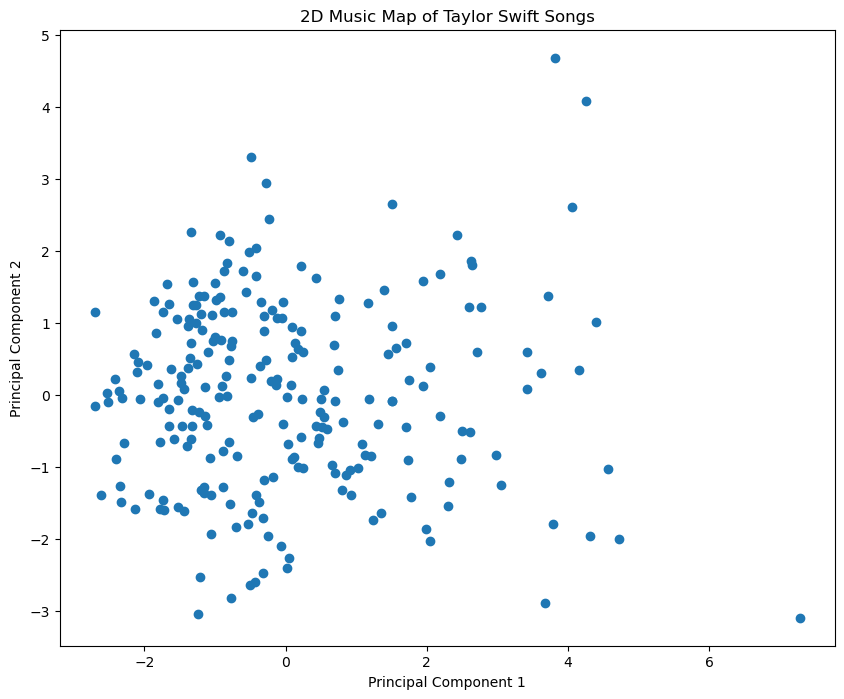

In [128]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select the numerical features for the music map
features = data.select_dtypes(include=[float, int])

# Remove rows with missing values
cleaned_data = features.dropna()

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cleaned_data)

# Apply PCA to reduce the features to 2 dimensions
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plot the 2D music map
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Music Map of Taylor Swift Songs')
plt.show()

# Rowan Feist - Code

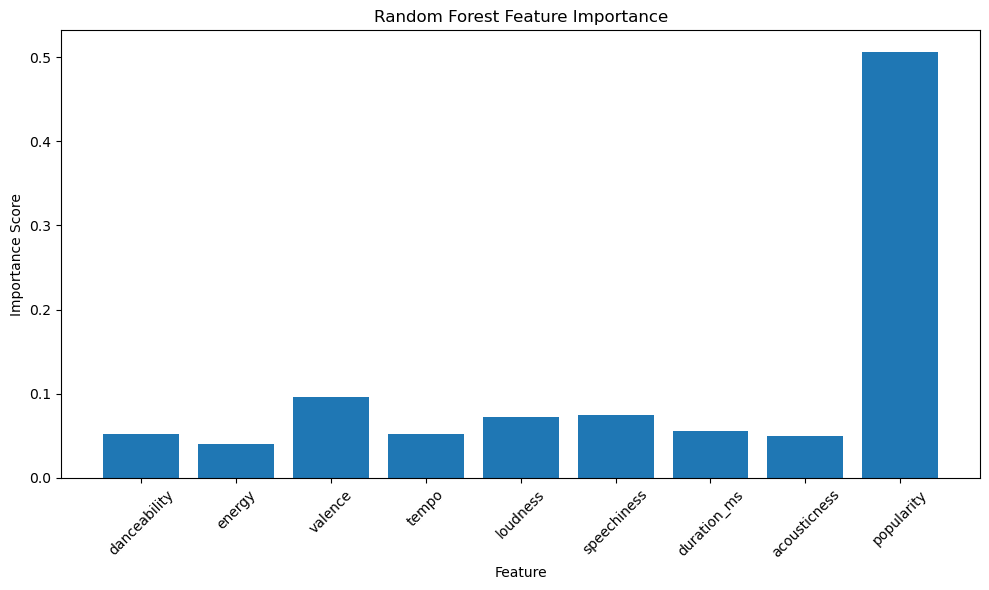

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Connect to SQLite database
conn = sqlite3.connect('TaylorSwift_streamingdata.db')
cursor = conn.cursor()

# Fetch data from SQLite
cursor.execute("SELECT danceability, energy, valence, tempo, loudness, speechiness, duration_ms, acousticness, popularity, total_streams, song_name FROM Taylor_Swift_Data")
data = cursor.fetchall()
conn.close()

# Convert fetched data to DataFrame
data = pd.DataFrame(data, columns=['danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness', 'duration_ms', 'acousticness', 'popularity', 'total_streams', 'song_name'])

# Select features and target variable
X = data[['danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness', 'duration_ms', 'acousticness', 'popularity']]
y = data['total_streams']

# Initialize and train the Random Forest Regression model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X, y)

# Get feature importance from the RandomForest model
feature_importance_scores = model_rf.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance_scores)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Train a Linear Regression model to predict "ideal" feature values
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict "ideal" feature values for all songs
predicted_ideal_values = regression_model.predict(X)

# Calculate similarity score for each song
song_similarity_scores = {}
for index, song_features in X.iterrows():
    similarity_score = sum(abs(predicted_ideal_values[index] - song_features))  # Absolute difference
    song_name = data.loc[index, 'song_name']  # Get song name
    song_similarity_scores[song_name] = similarity_score

# Normalize similarity scores between 0 and 100
min_score = min(song_similarity_scores.values())
max_score = max(song_similarity_scores.values())
normalized_scores = {
    song_name: ((score - min_score) / (max_score - min_score)) * 100
    for song_name, score in song_similarity_scores.items()
}

# Sort songs based on similarity score
sorted_songs = sorted(song_similarity_scores.items(), key=lambda x: x[1])

# Save normalized similarity scores to a CSV file
normalized_scores_df = pd.DataFrame(normalized_scores.items(), columns=['Song Name', 'Normalized Similarity Score'])
normalized_scores_df.to_csv('normalized_similarity_scores.csv', index=False)

In [135]:
from sklearn.metrics import r2_score

# RandomForest model prediction
y_pred_rf = model_rf.predict(X)
# Calculate R2 score for RandomForest model
r2_rf = r2_score(y, y_pred_rf)
print("RandomForest R2 Score:", r2_rf)

# Linear Regression model prediction
y_pred_lr = regression_model.predict(X)
# Calculate R2 score for Linear Regression model
r2_lr = r2_score(y, y_pred_lr)
print("Linear Regression R2 Score:", r2_lr)

RandomForest R2 Score: 0.9192334725079233
Linear Regression R2 Score: 0.2822882113708225
